# Итоговая работа по курсу "Python для анализа данных"

## Оглавление

1. [Загрузка, подготовка и изучение исходного файла](#task1)  
2. [Расчёт основных статистик для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)](#task2)  
3. [Расчет и визуализация корреляционной матрицы для количественных переменных. Определение двух самых скоррелированных и двух наименее скоррелированных переменных](#task3)  
4. [Расчёт количества сотрудников, работающих в каждом департаменте](#task4)  
5. [Распределение сотрудников по зарплатам](#task5)  
6. [Распределение сотрудников по зарплатам в каждом департаменте по отдельности](#task6)  
7. [Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом](#task7)  
8. [Рассчёт показателей среди уволившихся и неуволившихся сотрудников (по отдельности)](#task8)  
 8.1 [Доля сотрудников с повышением за последние 5 лет](#subtask1)  
 8.2 [Средняя степень удовлетворенности](#subtask2)  
 8.3 [Среднее количество проектов](#subtask3)  
9. [Разделение данных на тестовую и обучающую выборки. Построение модели LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценка качества модели на тестовой выборки](#task9)  


Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.   
Файл доступен [тут](https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing)

Признаки:
1. satisfaction_level​ - Уровень удовлетворенности работой  
2. last_evaluation​ - Время с момента последней оценки в годах  
3. number_projects​ - Количество проектов, выполненных за время работы  
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц  
5. time_spend_company​ - Стаж работы в компании в годах  
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7. left​ - Уволился ли сотрудник  
8. promotion_last_5years​ - Повышался ли сотрудник за последние пять лет  
9. department ​ - Отдел в котором работает сотрудник  
10. salary​ - Относительный уровень зарплаты  
 
Требуется выполнить следующее задание:  

1. Загрузить файл HR.csv в pandas dataframe.  
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).  
3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определить две самые скоррелированные и две наименеескоррелированные переменные.  
4. Рассчитать сколько сотрудников работает в каждом департаменте.  
5. Показать распределение сотрудников по зарплатам.  
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.  
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.  
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):    
   ● Доля сотрудников с повышением за последние 5 лет;    
   ● Средняя степень удовлетворенности;    
   ● Среднее количество проектов;    
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.  
10. Загрузить jupyter notebook с решение на github и прислать ссылку.  

<a id='task1'></a>
### 1. Загрузка, подготовка и изучение исходного файла.


In [1]:
import pandas as pd

In [2]:
# Загружаю датасет в датафрейм
hr = pd.read_csv('HR.csv')

# Изменяю наименование столбца, начинающегося с верхнего регистра в нижний (формально, для наглядности):
hr.rename(columns = {hr.columns[5]: 'work_accident'}, inplace = True)
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr.info() # Пропуски в данных отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Уникальные значения столбцов
print(hr.satisfaction_level.unique())
print(hr.last_evaluation.unique())
print(hr.number_project.unique())
print(hr.average_montly_hours.unique())
print(hr.time_spend_company.unique())
print(hr.work_accident.unique())
print(hr.left.unique())
print(hr.promotion_last_5years.unique())
print(hr.department.unique())
print(hr.salary.unique())

[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
[2 5 7 6 4 3]
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 2

<a id='task2'></a>
### 2. Расчёт основных статистик для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [5]:
hr.describe() # Средние значения, стандартные отклонения, медианы, максимальные и минимальные значения:

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



#### Моды

In [6]:
mode = pd.DataFrame(hr.mode().iloc[:-1, [0, 1, 2, 3, 4, 5, 6, 7]].T)
mode.columns = ['mode']
mode

,mode
satisfaction_level,0.10
last_evaluation,0.55
number_project,4.00
average_montly_hours,135.00
time_spend_company,3.00
work_accident,0.00
left,0.00
promotion_last_5years,0.00


#### Дисперсии

In [7]:
disp = pd.DataFrame(hr.var())
disp.columns = ['dispersion']
disp

,dispersion
satisfaction_level,0.061817
last_evaluation,0.029299
number_project,1.519284
average_montly_hours,2494.313175
time_spend_company,2.131998
work_accident,0.123706
left,0.181411
promotion_last_5years,0.020817


##### Моды для salary & department. 

In [8]:
print('Значение моды по признаку "salary": ', hr.salary.value_counts().index[0])
print('Значение моды по признаку "department": ', hr.department.value_counts().index[0])

Значение моды по признаку "salary":  low
Значение моды по признаку "department":  sales


##### Т.е. самая рапространненая категория зарплаты - низкая и больше всего сотрудников работает в отделе продаж.

<a id='task3'></a>
### 3. Расчет и визуализация корреляционной матрицы для количественных переменных. Определение двух самых скоррелированных и двух наименее скоррелированных переменных.

##### Расчет корреляционной матрицы.

In [9]:
display(hr.corr(method='kendall'))
display(hr.corr(method='spearman'))
display(hr.corr())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


##### Визуализация корреляционной матрицы.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

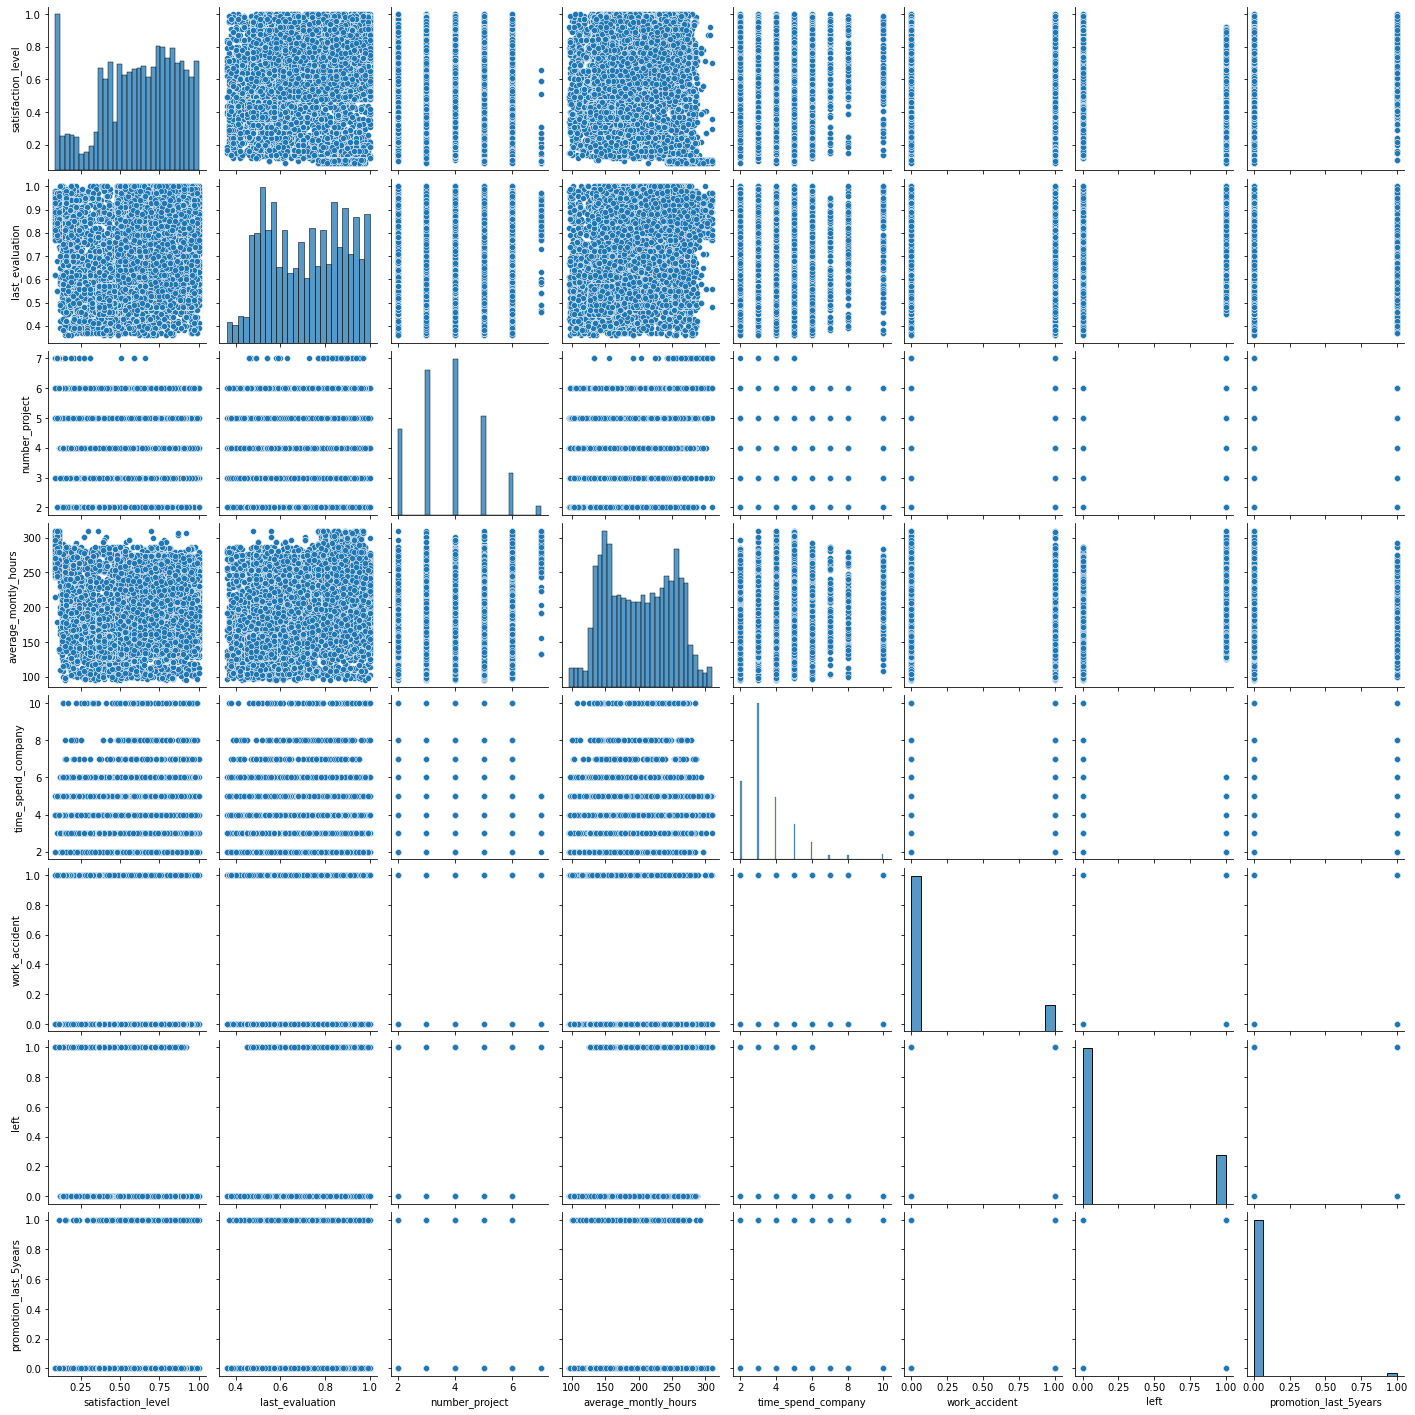

In [11]:
sns.pairplot(hr)

<AxesSubplot:>

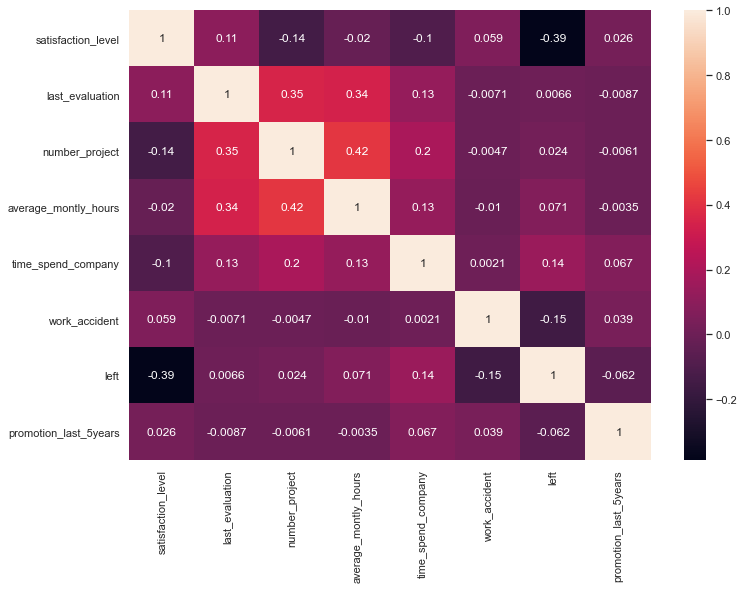

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hr.corr(), annot=True)

##### Самые скоррелированные переменные: 'average_montly_hours' & 'number_project', т.е. 'среднее количество часов на рабочем месте в месяц' и 'количество проектов, выполненных за время работы'. Что является логичным фактором.


In [13]:
print('Коэф. корреляции Пирсона:')
print(round(hr[['average_montly_hours', 'number_project']].corr()['number_project'][0], 6))
print('Коэф. корреляции Спирмана:')
print(round(hr[['average_montly_hours', 'number_project']].corr(method='spearman')['number_project'][0], 6))
print('Коэф. корреляции Кенделла:')
print(round(hr[['average_montly_hours', 'number_project']].corr(method='kendall')['number_project'][0], 6))

Коэф. корреляции Пирсона:
0.417211
Коэф. корреляции Спирмана:
0.397855
Коэф. корреляции Кенделла:
0.306987


##### Наименьшую корреляцию имеют переменные: 'left' & 'satisfaction_level', т.е. 'уволился ли сотрудник' и 'уровень удовлетворенности работой'. 

In [14]:
print('Коэф. корреляции Пирсона:')
print(round(hr[['left', 'satisfaction_level']].corr()['satisfaction_level'][0], 6))
print('Коэф. корреляции Спирмана:')
print(round(hr[['left', 'satisfaction_level']].corr(method='spearman')['satisfaction_level'][0], 6))
print('Коэф. корреляции Кенделла:')
print(round(hr[['left', 'satisfaction_level']].corr(method='kendall')['satisfaction_level'][0], 6))

Коэф. корреляции Пирсона:
-0.388375
Коэф. корреляции Спирмана:
-0.365842
Коэф. корреляции Кенделла:
-0.300675


<a id='task4'></a>
### 4. Расчёт количества сотрудников, работающих в каждом департаменте.

In [15]:
departments_distribution = hr.department.value_counts()

for k, v in departments_distribution.items():
    print('В отделе', k, 'работают', v, 'сотрудников')    

В отделе sales работают 4140 сотрудников
В отделе technical работают 2720 сотрудников
В отделе support работают 2229 сотрудников
В отделе IT работают 1227 сотрудников
В отделе product_mng работают 902 сотрудников
В отделе marketing работают 858 сотрудников
В отделе RandD работают 787 сотрудников
В отделе accounting работают 767 сотрудников
В отделе hr работают 739 сотрудников
В отделе management работают 630 сотрудников


In [16]:
departments_distribution_df = pd.DataFrame(hr.department.value_counts().reset_index())
departments_distribution_df.columns = ['department', 'number_of_employees']
departments_distribution_df

,department,number_of_employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


<a id='task5'></a>
### 5. Распределение сотрудников по зарплатам.

In [17]:
salaries_distribution = hr.salary.value_counts()

for k, v in salaries_distribution.items():
    print('Зарплату категории', k, 'получают', v, 'сотрудников')    

Зарплату категории low получают 7316 сотрудников
Зарплату категории medium получают 6446 сотрудников
Зарплату категории high получают 1237 сотрудников


In [18]:
salaries_distribution_df = pd.DataFrame(hr.salary.value_counts().reset_index())
salaries_distribution_df.columns = ['salary', 'number_of_employees']
salaries_distribution_df

,salary,number_of_employees
0,low,7316
1,medium,6446
2,high,1237


<a id='task6'></a>
### 6. Распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [19]:
hr.pivot_table(index = 'salary', columns = 'department', values = 'left', aggfunc = 'count').head()

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


<a id='task7'></a>
### 7. Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [20]:
# H0: сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом.(time_high <= time_low)
# H1: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.(time_high > time_low)

In [21]:
# Формирую df по сотрудникам только с высоким и низким окладом и средним количеством часов на рабочем месте в месяц
Hdf = hr[['salary', 'average_montly_hours']].loc[hr.salary.isin(['low', 'high'])]
Hdf.head()

,salary,average_montly_hours
0,low,157
3,low,223
4,low,159
5,low,153
6,low,247


In [22]:
# Для определения T-test & P-value и визуализации распределения разделим Hdf на Series со значениями salary: low & high 
H_low = Hdf.loc[Hdf.salary.str.contains('low')]['average_montly_hours']
H_high = Hdf.loc[Hdf.salary.str.contains('high')]['average_montly_hours']

In [23]:
from scipy import stats

In [24]:
stats.ttest_ind(H_low, H_high)

Ttest_indResult(statistic=0.7288680398062308, pvalue=0.4661023478267259)

In [25]:
alpha = 0.05 # Уровень значимости
result = stats.ttest_ind(H_low, H_high, equal_var = False)
print(result)

if result.pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отклоняем гипотезу Н0


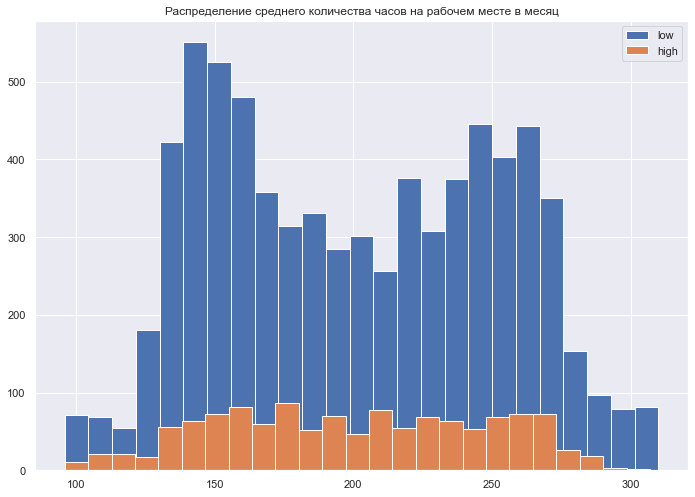

In [26]:
plt.hist(H_low, bins=25); #Выборка сотрудников с низкой зарплатой
plt.hist(H_high, bins=25); #Выборка сотрудников с высокой зарплатой
plt.title('Распределение среднего количества часов на рабочем месте в месяц')
plt.legend(Hdf.salary.unique())

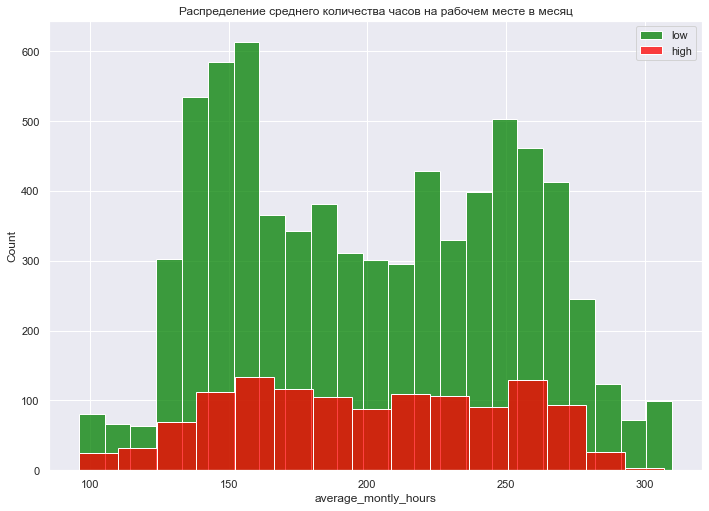

In [27]:
H_low_df = Hdf.loc[Hdf.salary.str.contains('low')]
H_high_df = Hdf.loc[Hdf.salary.str.contains('high')]
sns.histplot(H_low_df, x='average_montly_hours', color='green')
sns.histplot(H_high_df, x='average_montly_hours', color='red')
plt.title('Распределение среднего количества часов на рабочем месте в месяц')
plt.legend(Hdf.salary.unique())

#### Вывод. Значение P-value очень высокое для того чтобы отклонить основную гипотезу (Н0). Из визуализации видно, что сотрудники как с высоким, так и низким уровнем зарплаты, проводят на рабочем месте примерно одинаковое количество часов.

<a id='task8'></a>
### 8. Рассчёт показателей среди уволившихся и неуволившихся сотрудников (по отдельности).

<a id='subtask1'></a>
### 8.1 Доля сотрудников с повышением за последние 5 лет


In [28]:
piv_left = hr.pivot_table(index = 'left', columns = 'promotion_last_5years', values = 'salary', aggfunc = 'count').head()
piv_left

promotion_last_5years,0,1
left,,
0,11128,300
1,3552,19


In [29]:
print('Доля неуволившихся сотрудников с повышением за последние 5 лет составляет:',\
     round((piv_left.loc[0, 1] / piv_left.loc[0].sum()) * 100, 1), '%')
print('Доля уволившихся сотрудников с повышением за последние 5 лет составляет:',\
     round((piv_left.loc[1, 1] / piv_left.loc[1].sum()) * 100, 1), '%')

Доля неуволившихся сотрудников с повышением за последние 5 лет составляет: 2.6 %
Доля уволившихся сотрудников с повышением за последние 5 лет составляет: 0.5 %


<a id='subtask2'></a>
### 8.2 Средняя степень удовлетворенности

In [30]:
hr.groupby('left').satisfaction_level.mean().reset_index()

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [31]:
print('Средняя степень удовлетворенности неуволившихся сотрудников:',\
      round(hr.groupby('left').satisfaction_level.mean().loc[0], 2))
print('Средняя степень удовлетворенности уволившихся сотрудников:',\
     round(hr.groupby('left').satisfaction_level.mean().loc[1], 2))

Средняя степень удовлетворенности неуволившихся сотрудников: 0.67
Средняя степень удовлетворенности уволившихся сотрудников: 0.44


<a id='subtask3'></a>
### 8.3 Среднее количество проектов

In [32]:
hr.groupby('left').number_project.mean().reset_index()

,left,number_project
0,0,3.786664
1,1,3.855503


In [33]:
print('Среднее количество проектов неуволившихся сотрудников:',round(hr.groupby('left').number_project.mean().loc[0], 1))
print('Среднее количество проектов уволившихся сотрудников:',round(hr.groupby('left').number_project.mean().loc[1], 1))

Среднее количество проектов неуволившихся сотрудников: 3.8
Среднее количество проектов уволившихся сотрудников: 3.9


<a id='task9'></a>
### 9. Разделение данных на тестовую и обучающую выборки. Построение модели LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценка качества модели на тестовой выборки.

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
# Определяю признаки (факторы)
df = hr[['satisfaction_level', 'last_evaluation','number_project', 'average_montly_hours', 'time_spend_company', \
         'work_accident', 'promotion_last_5years']]
res = hr.left

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 820.4 KB


In [37]:
res.unique()

array([1, 0], dtype=int64)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df, res, test_size=0.30) # разделяю выборку на тренировочную и тестовую
y_test = y_test.reset_index().left # сбрасываю индекс y_test
lda = LinearDiscriminantAnalysis() # инициализирую LDA функционал
lda.fit(X_train, y_train) # обучаем данные

LinearDiscriminantAnalysis()

In [40]:
lda.predict(X_test) # делаю прогноз на тестовой выборке

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# смотрю разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.columns = ['left_test', 'left_pred']
result

,left_test,left_pred
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4495,0,0
4496,1,1
4497,1,0
4498,0,0


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
# Оценка качества модели
accuracy_score(y_test, lda.predict(X_test))

0.7706666666666667

In [44]:
# Коэффициенты дискриминатных линий
lda.coef_

array([[-4.48628213e+00,  6.53280890e-01, -2.28938859e-01,
         3.87110220e-03,  2.13461733e-01, -1.08122813e+00,
        -1.10944226e+00]])